## Variables à ajouter issues des recherches biblio

Variable(s): 

- Population des pays représentés 
- Variable indiquant si le pays est communiste ou pas 
- Variable indiquant si le pays est stable ou pas 
- Variable indiquant si le pays est émergeant ou pas ( otherwise pauvre , riche à peaufiner par la suite) 
- Variable indiquant si le pays a la culture du sport ou pas. 
- Variable indiquant le PIB par habitant 
- Variable indiquant les financements alloués aux sports (olympiques ou pas)


Il faut créer le train et le test avec des données 2024 , il faut les construire , il faut aussi savoir traiter le fait que cette fois ci la Russie ne sera pas disponible .
Faire indice : pays perturbé 1 avec Russie par exemple ou bien on enlève la Russie  (contexte géopolitique simple, on tah les années où j'ai eu un pb )

But c'est de prédire le nombre de médailles pour chaque pays , indicateur simple 
EXTRA POUR AVOIR 20 : Attribuer un poid aux médailles -> pour potentiellement savoir le nb d'or , argent , bronze

# Introduction  (Business Understanding) 

## Détermination objectifs métier , analytique du projet 

## Identifier les contraintes , limites et risque du projet

# Data understanding

### Chargement des différentes bases de données + étude du chargement en mémoire

Attention au COVID 19 , influence public , web scrapping sur 30 ans de tous les pays qui ont organisé les jeux 
Attention aux pays pas autorisés à concourir 
Pays en guerre qui envoient moins d'athlètes 
Ukraine 
Palestine 
Iles caiman -> doivent être rattachées à un pays 

JO hiver 
JO été Corrélation 
Apparition des femmes dans les JO ( échantillonnage ) 

Culture du sport : Comment la créer ? 
Budget alloué aux sports (investissement , infrastructures ... ) 
Nb de professionnels 
Nb de licencés 
Nb de sports olympiques disponibles à l'école 

Variable : Pays Communiste ou pas 

Croissance pays économique 

Athlète à partir de 25 ans il n'a plus le niveau : on commence à partir de 2000 , JO Sydney 

Indice dvp des pays à recevoir 

Variable pays organisateur 

Sport qui ont des gens avec un âge bien définie (exemple skate Japonais c'est que des jeunes <= 18 ans)

Dataset coupes mondes de discipline  
    
Variable Note selon l'âge 

Athlète qui sont comptés comme participant à deux pays 

Variable : religion majoritaire pays 

Espérance de vie par pays 
Variable pays dvp ou pas 


Recupérer données JO 2018 et 2021

Variable Poids par Médailles : échelloner les JO de 1 à 10 pour 
Variable Poids par année : 

### Etude des types optimaux 

### Fusion des différentes bases de données en une seule

## EDA (graph, pivot table ,Matrix confusion...)

In [91]:
import pandas as pd 
import numpy as np 

In [91] used 0.0 MiB RAM in 0.10s (system mean cpu 1%, single max cpu 6%), peaked 0.0 MiB above final usage, current RAM usage now 526.0 MiB


In [92]:
%load_ext ipython_memory_usage 

Enabling IPython Memory Usage, use %imu_start to begin, %imu_stop to end
In [92] used 0.0 MiB RAM in 0.10s (system mean cpu 18%, single max cpu 86%), peaked 0.0 MiB above final usage, current RAM usage now 526.1 MiB


In [93]:
%imu_start

'IPython Memory Usage started'

In [93] used 0.0 MiB RAM in 0.10s (system mean cpu 4%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 526.1 MiB


In [94]:
df_athlete=pd.read_csv('data/athlete_events.csv',sep=',')

#df_athlete

ParserError: Error tokenizing data. C error: Expected 14 fields in line 282994, saw 16


In [94] used 3.6 MiB RAM in 0.50s (system mean cpu 5%, single max cpu 100%), peaked 44.6 MiB above final usage, current RAM usage now 529.7 MiB


In [ ]:
df_athlete.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [6] used -157.9 MiB RAM in 0.24s (system mean cpu 25%, single max cpu 40%), peaked 0.0 MiB above final usage, current RAM usage now 55.9 MiB


La base de données comporte 271116 lignes et 15 colonnes , chaque ligne correspond à un athlète ayant participé dans une discipline aux jeux olympiques 

### Chargement et analyse de la mémoire 

In [ ]:
#df_athlete.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 177.8 MB
In [5] used -33.3 MiB RAM in 0.43s (system mean cpu 35%, single max cpu 100%), peaked 0.0 MiB above final usage, current RAM usage now 213.8 MiB


La base de données actuellement utilise 177.8 MB , le bloc -33.3 MiB par apport au précédent ( logique c'est juste une ligne de code tandis que l'autre on exécute une DF) 

Certaines informations manquantes sur le poids, la taille , l'âge de certains joueurs 

# Guillaume 

In [21]:
import pandas as pd
import numpy as np
import ipython_memory_usage.ipython_memory_usage as imu
from describe_csv import *  # charge le fichier describe_csv.py par chunk de 10 000 (10**4)
from ydata_profiling import ProfileReport
import math
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import scipy as sp
import scipy.stats
from pivottablejs import pivot_ui
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn import metrics
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.pipeline import make_pipeline, make_union
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

imu.start_watching_memory()



In [21] used 0.0 MiB RAM in 0.11s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 326.1 MiB


In [22]:
import pandas as pd

df = pd.read_csv('data/data_FLO_without_NaN.csv')
df.head(2)

,Name,Sex,Age,Height,Team,NOC,Games,Year,Season,City,...,Weight,Country_org,Population,PIB/habitant,Score_medaille,Country,Host_country,Participation_own_country,Soviet_past,PIB
0,AALERUD Katrine,F,27.0,175.0,Norway,NOR,Tokyo 2020,2020,Summer,Tokyo,...,74.0,Japan,5195921.0,74400.369777,0,Norway,Japan,0,0,5.792670e+11
1,ABAD Nestor,M,28.0,165.0,Spain,ESP,Tokyo 2020,2020,Summer,Tokyo,...,71.0,Japan,46418269.0,25831.582305,0,Spain,Japan,0,0,1.397510e+12


In [22] used -4.0 MiB RAM in 0.32s (system mean cpu 14%, single max cpu 75%), peaked 30.5 MiB above final usage, current RAM usage now 322.0 MiB


Normalisation du noms des 'Team' 

In [23]:
# # RUSSIA
# df.loc[(df['Team'] == 'Soviet Union') & (df['NOC'] == 'URS'), ['Team', 'NOC']] = ['Russia', 'RUS'] # URSS période 1952-1988
df.loc[(df['Team'] == 'ROC') & (df['NOC'] == 'ROC'), ['Team', 'NOC']] = ['Germany', 'RUS'] # JO 2020

# # GERMANY
# df.loc[(df['Team'] == 'East Germany') & (df['NOC'] == 'GDR'), ['Team', 'NOC']] = ['Germany', 'GER']

# CHINA
df.loc[df['Team'] == "People's Republic of China", ['Team', 'NOC']] = ['China', 'CHN']

# UNITED STATES
df.loc[df['Team'] == "United States of America", ['Team', 'NOC']] = ['United States', 'USA']

In [23] used 0.4 MiB RAM in 0.12s (system mean cpu 4%, single max cpu 17%), peaked 0.0 MiB above final usage, current RAM usage now 322.4 MiB


In [24]:
import pandas as pd

# Votre DataFrame df doit être déjà défini

# Votre dictionnaire de correspondance
country_mapping = {
    'Indonesia-1': 'Indonesia',
    'Nigeria-2': 'Nigeria',
    'Brazil-1': 'Brazil',
    'Spain-2': 'Spain',
    'Brazil-2': 'Brazil',
    'Russia-2': 'Russia',
    'Japan-1': 'Japan',
    'Australia-2': 'Australia',
    'Greece-1': 'Greece',
    'Greece-2': 'Greece',
    'Japan-2': 'Japan',
    'Sweden-2': 'Sweden',
    'Belarus-1': 'Belarus',
    'Germany-2': 'Germany',
    'Great Britain-1': 'United Kingdom',
    'United States-1': 'United States',
    'United States-2': 'United States',
    'Canada-1': 'Canada',
    'Spain-1': 'Spain',
    'Australia-1': 'Australia',
    'Germany-1': 'Germany',
    'Romania-1': 'Romania',
    'Switzerland-2': 'Switzerland',
    'Czech Republic-2': 'Czech Republic',
    'France-2': 'France',
    'Czech Republic-1': 'Czech Republic',
    'Canada-2': 'Canada',
    'Austria-1': 'Austria',
    'India-1': 'India',
    'Sweden-1': 'Sweden',
    'Great Britain-2': 'United Kingdom',
    'Netherlands-2': 'Netherlands',
    'Ukraine-2': 'Ukraine',
    'Italy-1': 'Italy',
    'Netherlands-1': 'Netherlands',
    'Indonesia-2': 'Indonesia',
    'China-2': 'China',
    'China-1': 'China',
    'Argentina-1': 'Argentina',
    'Argentina-2': 'Argentina',
    'Italy-2': 'Italy',
    'Malaysia-1': 'Malaysia',
    'South Korea-2': 'South Korea',
    'Hong Kong-1': 'Hong Kong',
    'Switzerland-1': 'Switzerland',
    'Malaysia-2': 'Malaysia',
    'Cuba-1': 'Cuba',
    'Hungary-1': 'Hungary',
    'France-1': 'France',
    'Poland-2': 'Poland',
    'Austria-2': 'Austria',
    'Serbia-2': 'Serbia',
    'Nigeria-1': 'Nigeria',
    'Denmark-2': 'Denmark',
    'Cuba-2': 'Cuba',
    'Poland-1': 'Poland',
    'Norway-2': 'Norway',
    'Belarus-2': 'Belarus',
    'Norway-1': 'Norway',
    'Slovakia-2': 'Slovakia',
    'Denmark-1': 'Denmark',
    'South Korea-1': 'South Korea',
    'Singapore-2': 'Singapore',
    'Russia-1': 'Russia',
    'Hong Kong-2': 'Hong Kong',
    'Ukraine-1': 'Ukraine',
    'Slovenia-1': 'Slovenia',
    'Slovakia-1': 'Slovakia',
    'Hungary-2': 'Hungary',
    'Slovenia-2': 'Slovenia',
    'Romania-2': 'Romania',
    'Thailand-1': 'Thailand',
    'India-2': 'India',
    'Thailand-2': 'Thailand',
    'Latvia-1': 'Latvia',
    'Latvia-2': 'Latvia',
    'Singapore-1': 'Singapore',
    'Serbia-1': 'Serbia',
    'China-3': 'China',  # Ajout de la virgule manquante
    'Samoa (until 1996 Western Samoa)': 'Samoa',  # Correction du nom de l'équipe
    'Australia-3': 'Australia',
    'Chinese Taipei-2': 'Taiwan',  # Correction du nom de l'équipe
    'Chinese Taipei-1': 'Taiwan',  # Correction du nom de l'équipe
    'ChinaSamoa (until 1996 Western Samoa)': 'Samoa'  # Correction du nom de l'équipe
}

# Appliquer la normalisation sur la colonne 'Team'
df['Team'] = df['Team'].map(lambda x: country_mapping.get(x, x))

# Afficher le DataFrame mis à jour
df.head(2)

,Name,Sex,Age,Height,Team,NOC,Games,Year,Season,City,...,Weight,Country_org,Population,PIB/habitant,Score_medaille,Country,Host_country,Participation_own_country,Soviet_past,PIB
0,AALERUD Katrine,F,27.0,175.0,Norway,NOR,Tokyo 2020,2020,Summer,Tokyo,...,74.0,Japan,5195921.0,74400.369777,0,Norway,Japan,0,0,5.792670e+11
1,ABAD Nestor,M,28.0,165.0,Spain,ESP,Tokyo 2020,2020,Summer,Tokyo,...,71.0,Japan,46418269.0,25831.582305,0,Spain,Japan,0,0,1.397510e+12


In [24] used 1.3 MiB RAM in 0.12s (system mean cpu 1%, single max cpu 17%), peaked 0.0 MiB above final usage, current RAM usage now 323.7 MiB


On vérifie que toute les Team son bien normalisé

In [25]:
teams_with_number = df[df['Team'].str.contains('\d')]
print(teams_with_number['Team'])


Series([], Name: Team, dtype: object)
In [25] used 0.0 MiB RAM in 0.13s (system mean cpu 3%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 323.7 MiB


# EDA 

In [26]:
df = df[df['Medal'] != 'Pas_Medaille']


In [26] used 15.1 MiB RAM in 0.12s (system mean cpu 2%, single max cpu 67%), peaked 7.2 MiB above final usage, current RAM usage now 338.8 MiB


In [27]:
# TRAITER AGE NULL (moyenne des ages)
df['Age'] = df['Age'].fillna(df['Age'].mean())

# TRAITER HEIGHT NULL (moyenne des heights)
df['Height'] = df['Height'].fillna(df.groupby('Sex')['Height'].transform('mean'))

# TRAITER WEIGHT NULL (moyenne des weights)
df['Weight'] = df['Weight'].fillna(df.groupby('Sex')['Weight'].transform('mean'))

# TRAITER SEASON NULL (0 si null, 1 sinon)
df['Season'] = np.where(df['Season'].isnull(), 0, 1)

# TRAITER AGE GROUP
df['AgeGroup'] = pd.cut(df.Age, bins=range(0, 81, 10), right=True)

# TRAITER WEIGHT GROUP
df['WeightGroup'] = pd.cut(df.Weight, bins=range(0, 215, 20), right=True)

# TRAITER HEIGHT GROUP
df['HeightGroup'] = pd.cut(df.Height, bins=range(100, 227, 20), right=True)


In [27] used 3.2 MiB RAM in 0.12s (system mean cpu 3%, single max cpu 50%), peaked 0.0 MiB above final usage, current RAM usage now 342.0 MiB


In [28]:
attrs = ['Sex', 'AgeGroup', 'HeightGroup', 'WeightGroup'] # attrs permet de sélectionner les colonnes à afficher

In [28] used 0.0 MiB RAM in 0.10s (system mean cpu 0%, single max cpu 0%), peaked 0.0 MiB above final usage, current RAM usage now 342.1 MiB


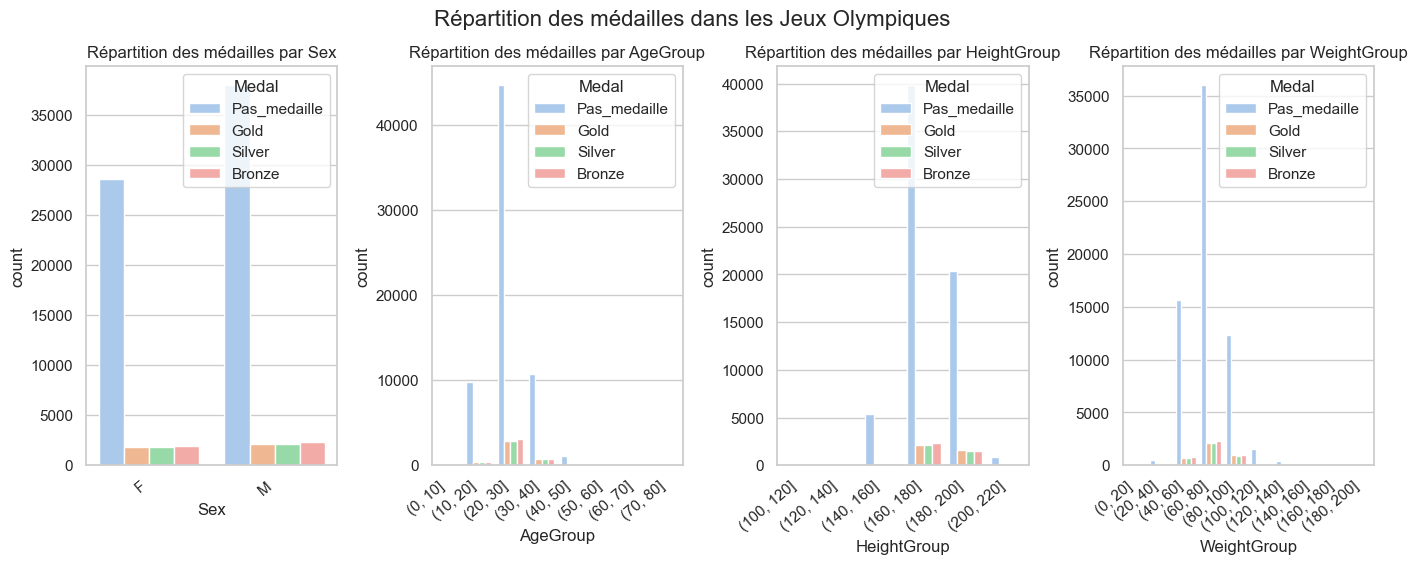

In [34] used -24.8 MiB RAM in 1.00s (system mean cpu 6%, single max cpu 100%), peaked 24.7 MiB above final usage, current RAM usage now 344.5 MiB


In [34]:

# Paramètres de style de Seaborn
sns.set(style="whitegrid")

# Créer la figure
figure = plt.figure(figsize=(14, 10))
figure.suptitle('Répartition des médailles dans les Jeux Olympiques', fontsize=16)

# Ajuster l'espacement entre les sous-graphiques
plt.subplots_adjust(top=0.9, bottom=0.1, hspace=0.5, wspace=0.4)

# Boucle sur les attributs pour créer les sous-graphiques
for i, col in enumerate(attrs):
    plt.subplot(2, 4, i+1)
    plt.xticks(rotation=40, ha='right')  # Rotation des étiquettes sur l'axe des x
    sns.countplot(x=col, hue='Medal', data=filtered_df, palette='pastel')  # Utiliser une palette de couleurs pastel
    plt.title('Répartition des médailles par ' + col)  # Titre du sous-graphique

# Améliorer la disposition des sous-graphiques
plt.tight_layout()
plt.show()


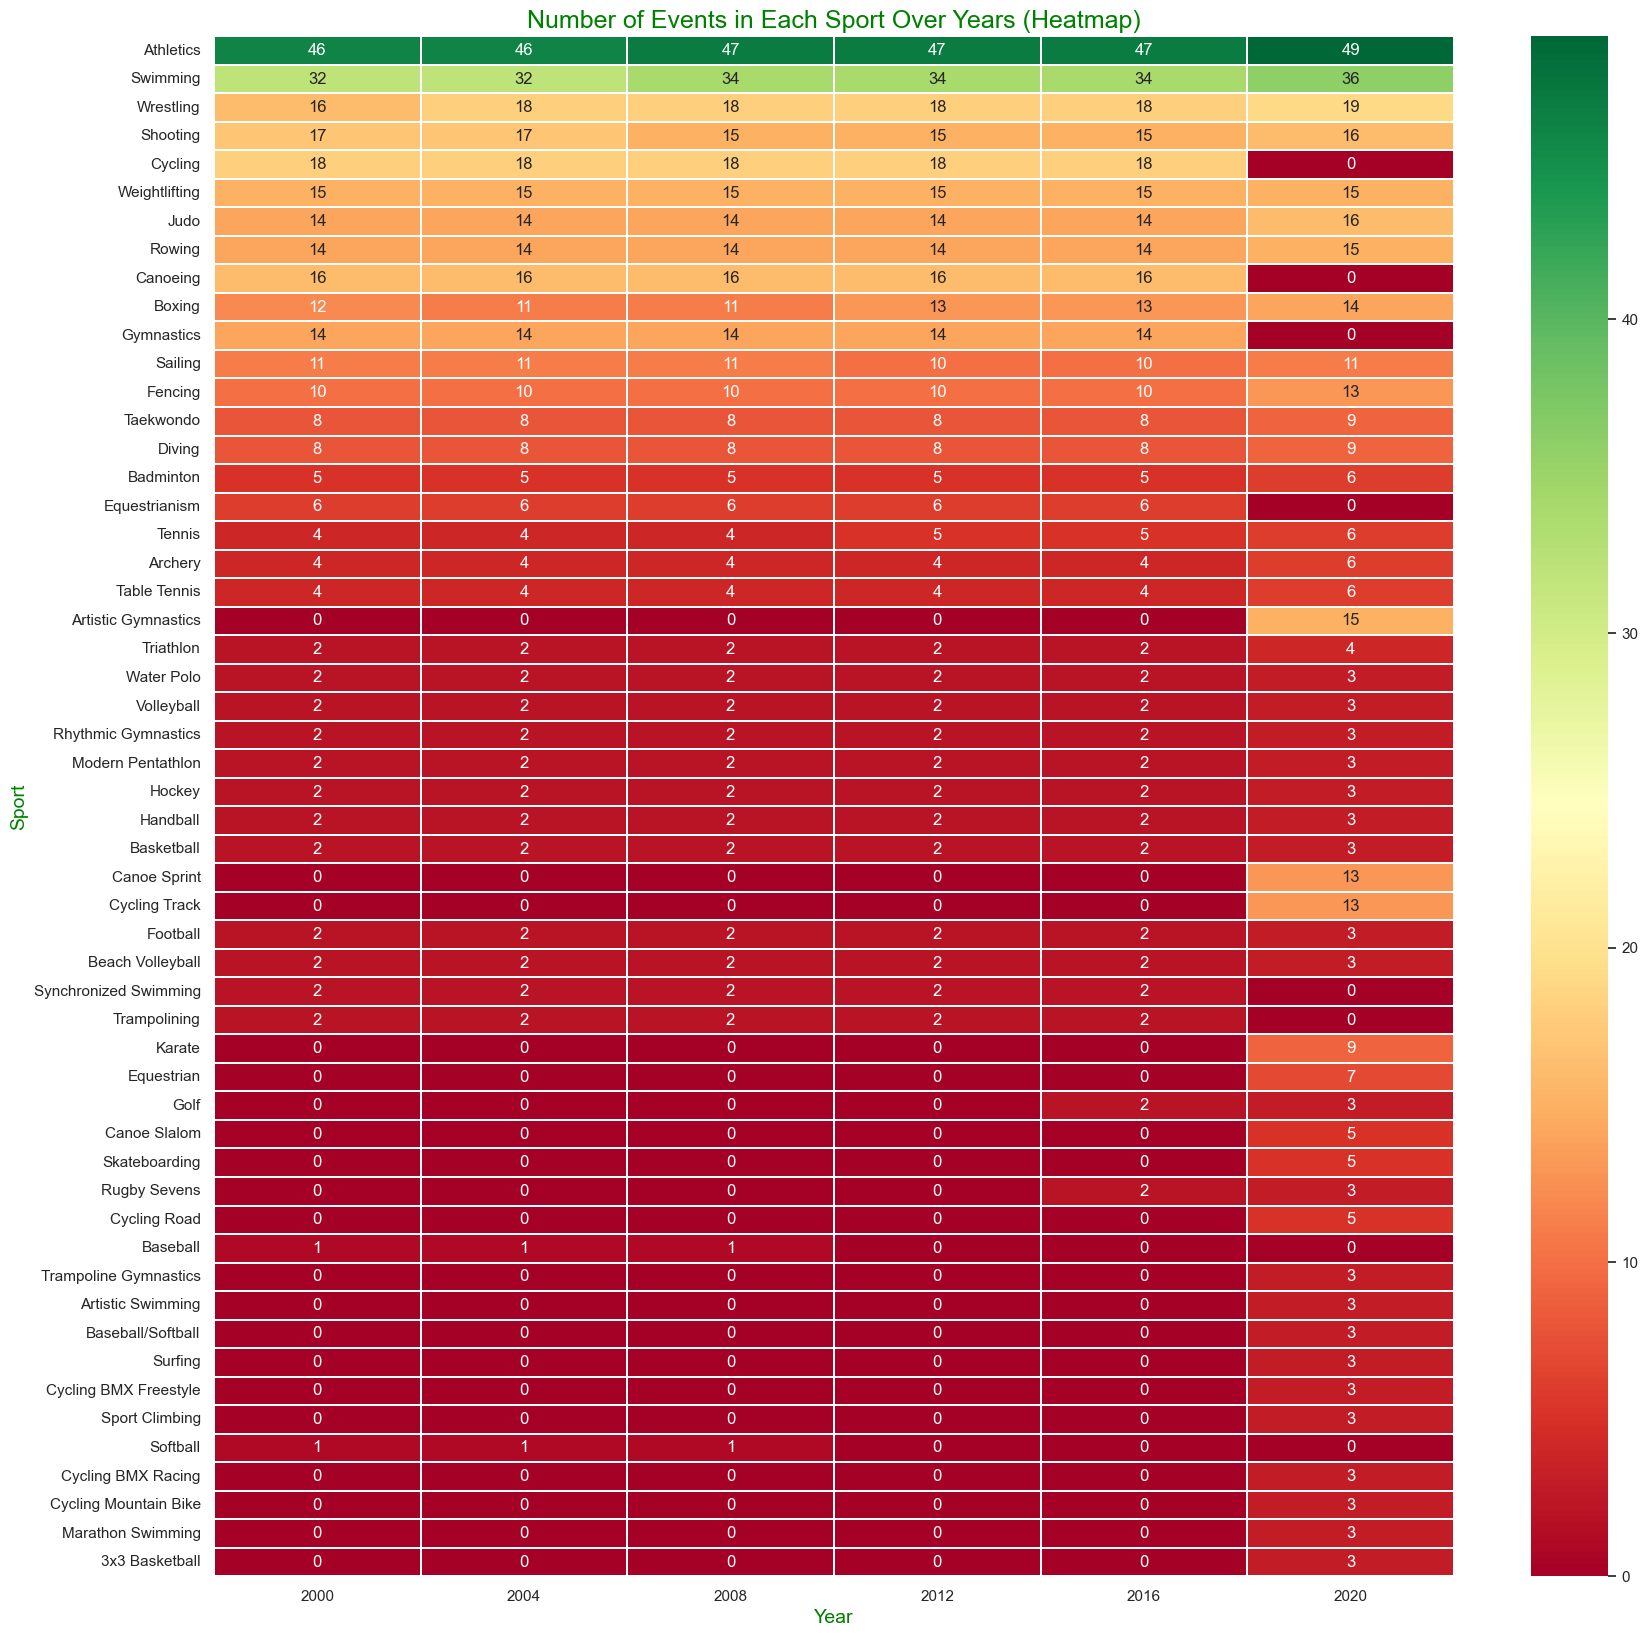

In [30] used 12.9 MiB RAM in 0.80s (system mean cpu 3%, single max cpu 100%), peaked 25.3 MiB above final usage, current RAM usage now 359.4 MiB


In [30]:
sport_year = df.pivot_table(index='Sport', columns='Year', values='Event', aggfunc=lambda x: len(x.unique()))
sport_year.fillna(0, inplace=True)
sport_year = sport_year.reindex(sport_year.sum(axis=1).sort_values(ascending=False).index)

# Affichage de la heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(sport_year, annot=True, linewidths=0.05, cmap="RdYlGn")
plt.xlabel('Year', size=14, color="green")
plt.ylabel('Sport', size=14, color="green")
plt.title('Number of Events in Each Sport Over Years (Heatmap)', size=18, color="green")
plt.show()

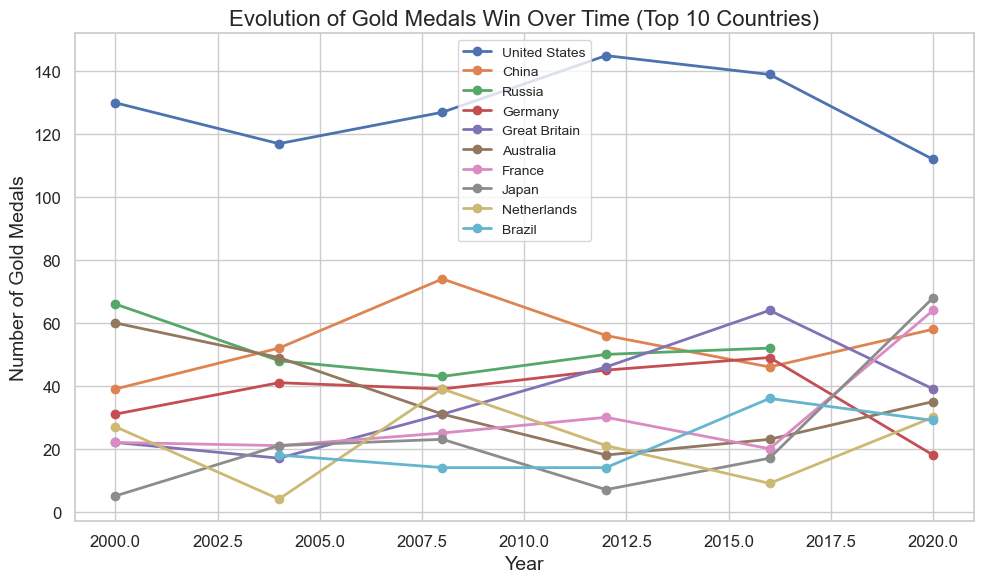

In [31] used 2.8 MiB RAM in 0.36s (system mean cpu 3%, single max cpu 100%), peaked 4.5 MiB above final usage, current RAM usage now 362.3 MiB


In [31]:
import matplotlib.pyplot as plt

# Filter the data to include only gold medal winners
gold_medals = df[df['Medal'] == 'Gold']

# Group the data by year and count the number of gold medals won each year for each country
gold_medals_by_year_and_country = gold_medals.groupby(['Year', 'Team'])['Medal'].count().unstack()

# Select the top 10 countries with the most gold medals overall
top_10_countries = gold_medals.groupby('Team')['Medal'].count().nlargest(10).index

# Plotting the curve for the evolution of gold medals over time for the top 10 countries
plt.figure(figsize=(10, 6))  # Taille de la figure

for country in top_10_countries:
    plt.plot(gold_medals_by_year_and_country.index, gold_medals_by_year_and_country[country], 
             marker='o', markersize=6, linewidth=2, label=country)  # Courbe pour chaque pays avec la légende

plt.title('Evolution of Gold Medals Win Over Time (Top 10 Countries)', fontsize=16)  # Titre
plt.xlabel('Year', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Number of Gold Medals', fontsize=14)  # Étiquette de l'axe y
plt.xticks(fontsize=12)  # Taille de la police des étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y

plt.grid(True)  # Afficher la grille
plt.legend(fontsize=10)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()


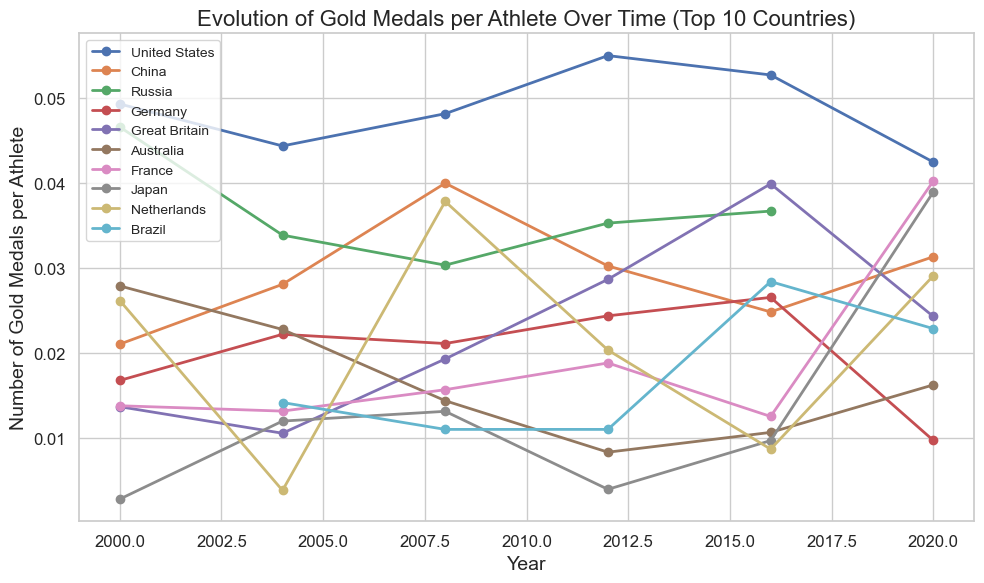

In [32] used 2.8 MiB RAM in 0.40s (system mean cpu 1%, single max cpu 100%), peaked 4.5 MiB above final usage, current RAM usage now 365.1 MiB


In [32]:
import matplotlib.pyplot as plt

# Calculate the total number of athletes per country
total_athletes_per_country = df.groupby('Team')['Name'].nunique()

# Filter the data to include only gold medal winners
gold_medals = df[df['Medal'] == 'Gold']

# Group the data by year and count the number of gold medals won each year for each country
gold_medals_by_year_and_country = gold_medals.groupby(['Year', 'Team'])['Medal'].count().unstack()

# Calculate the number of gold medals per athlete for each country and each year
gold_medals_per_athlete = gold_medals_by_year_and_country.div(total_athletes_per_country, axis=1)

# Select the top 10 countries with the most gold medals overall
top_10_countries = gold_medals.groupby('Team')['Medal'].count().nlargest(10).index

# Plotting the curve for the evolution of gold medals per athlete over time for the top 10 countries
plt.figure(figsize=(10, 6))  # Taille de la figure

for country in top_10_countries:
    plt.plot(gold_medals_per_athlete.index, gold_medals_per_athlete[country], 
             marker='o', markersize=6, linewidth=2, label=country)  # Courbe pour chaque pays avec la légende

plt.title('Evolution of Gold Medals per Athlete Over Time (Top 10 Countries)', fontsize=16)  # Titre
plt.xlabel('Year', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Number of Gold Medals per Athlete', fontsize=14)  # Étiquette de l'axe y
plt.xticks(fontsize=12)  # Taille de la police des étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y

plt.grid(True)  # Afficher la grille
plt.legend(fontsize=10)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()


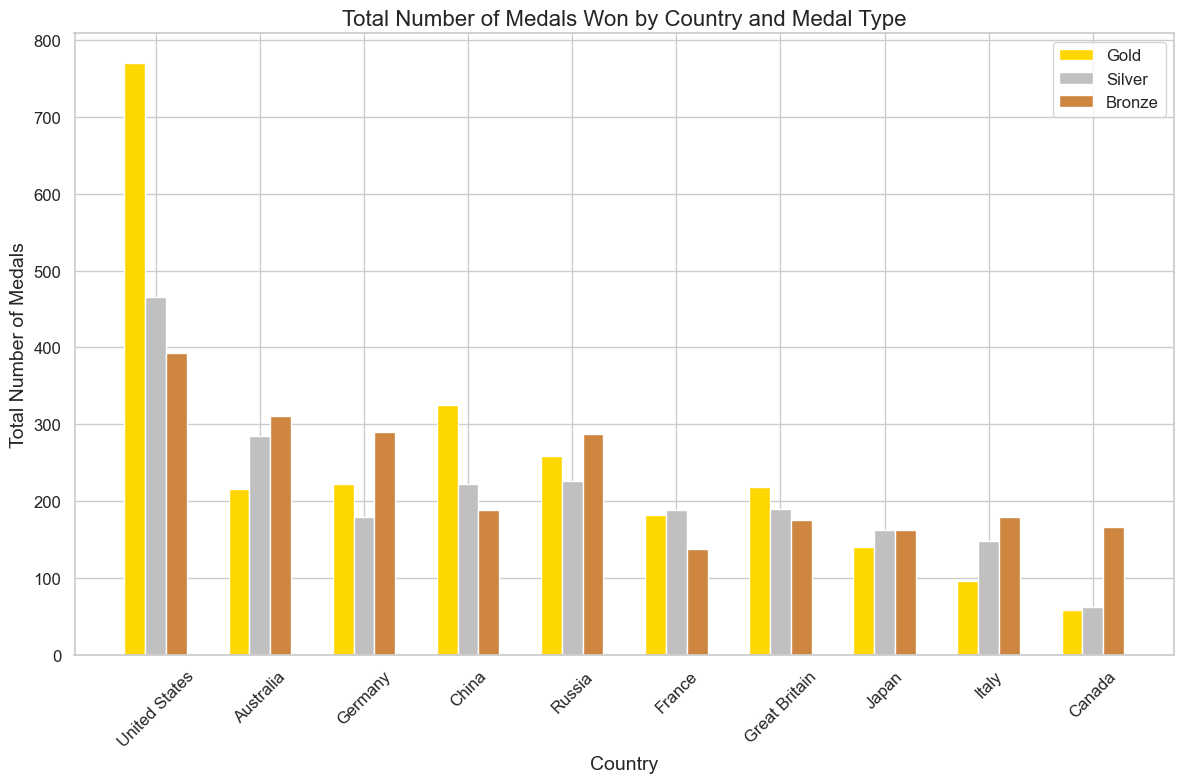

In [33] used 4.2 MiB RAM in 0.35s (system mean cpu 2%, single max cpu 100%), peaked 7.2 MiB above final usage, current RAM usage now 369.3 MiB


In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Group the data by country and count the total number of medals won by each country and each type of medal
medals_by_country = df.groupby(['Team', 'Medal']).size().unstack(fill_value=0)

# Select the top 10 countries with the most total medals
top_10_countries = medals_by_country.sum(axis=1).nlargest(10).index

# Select the medal types
medal_types = ['Gold', 'Silver', 'Bronze']

# Set the position of each bar on the x-axis
x = np.arange(len(top_10_countries))

# Set the width of the bars
width = 0.2

# Assign colors to each medal type
colors = {'Gold': 'gold', 'Silver': 'silver', 'Bronze': 'peru'}

# Plotting the grouped bar graph
plt.figure(figsize=(12, 8))  # Taille de la figure

for i, medal in enumerate(medal_types):
    plt.bar(x - width + i * width, medals_by_country.loc[top_10_countries, medal], 
            width=width, label=medal, color=colors[medal])

plt.title('Total Number of Medals Won by Country and Medal Type', fontsize=16)  # Titre
plt.xlabel('Country', fontsize=14)  # Étiquette de l'axe x
plt.ylabel('Total Number of Medals', fontsize=14)  # Étiquette de l'axe y
plt.xticks(ticks=x, labels=top_10_countries, rotation=45, fontsize=12)  # Étiquettes de l'axe x
plt.yticks(fontsize=12)  # Taille de la police des étiquettes de l'axe y
plt.legend(fontsize=12)  # Ajouter la légende
plt.tight_layout()  # Ajuster la mise en page
plt.show()
